In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [3]:
data = pd.read_csv('data/movie_statistic_dataset.csv')
data.dtypes


movie_title              object
production_date          object
genres                   object
runtime_minutes         float64
director_name            object
director_professions     object
director_birthYear       object
director_deathYear       object
movie_averageRating     float64
movie_numerOfVotes      float64
approval_Index          float64
Production budget $       int64
Domestic gross $          int64
Worldwide gross $         int64
dtype: object

In [4]:
data.replace('-', pd.NA, inplace=True)
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4047 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4047 non-null   object 
 1   production_date       4047 non-null   object 
 2   genres                4047 non-null   object 
 3   runtime_minutes       4047 non-null   float64
 4   director_name         4047 non-null   object 
 5   director_professions  4047 non-null   object 
 6   director_birthYear    4047 non-null   object 
 7   director_deathYear    4047 non-null   object 
 8   movie_averageRating   4047 non-null   float64
 9   movie_numerOfVotes    4047 non-null   float64
 10  approval_Index        4047 non-null   float64
 11  Production budget $   4047 non-null   int64  
 12  Domestic gross $      4047 non-null   int64  
 13  Worldwide gross $     4047 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 474.3+ KB


In [6]:
data.shape

(4047, 14)

In [7]:
pd.set_option('display.width',100)
pd.set_option('display.precision',3)
data.describe()

# Como se puede visualizar los datos no presentan una varianza alta por lo que esto es bueno para el modelo


,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
count,4047.000,4047.000,4.047e+03,4047.000,4.047e+03,4.047e+03,4.047e+03
mean,110.454,6.401,1.344e+05,5.028,3.773e+07,5.006e+07,1.079e+08
std,20.113,1.016,2.127e+05,1.362,4.455e+07,7.095e+07,1.865e+08
min,65.000,1.500,5.000e+00,0.450,5.000e+04,2.640e+02,4.230e+02
25%,96.000,5.800,2.140e+04,4.184,1.000e+07,8.327e+06,1.280e+07
50%,107.000,6.500,6.399e+04,5.024,2.270e+07,2.729e+07,4.249e+07
75%,120.000,7.100,1.557e+05,5.923,5.000e+07,6.167e+07,1.214e+08
max,271.000,9.300,2.696e+06,10.000,4.600e+08,8.141e+08,2.924e+09


C:\Users\pablo\AppData\Local\Temp\ipykernel_23164\1090781252.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["runtime_minutes"], ax = axes[0,0])
C:\Users\pablo\AppData\Local\Temp\ipykernel_23164\1090781252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["movie_averageRating"], 

<AxesSubplot: xlabel='Worldwide gross $', ylabel='Density'>

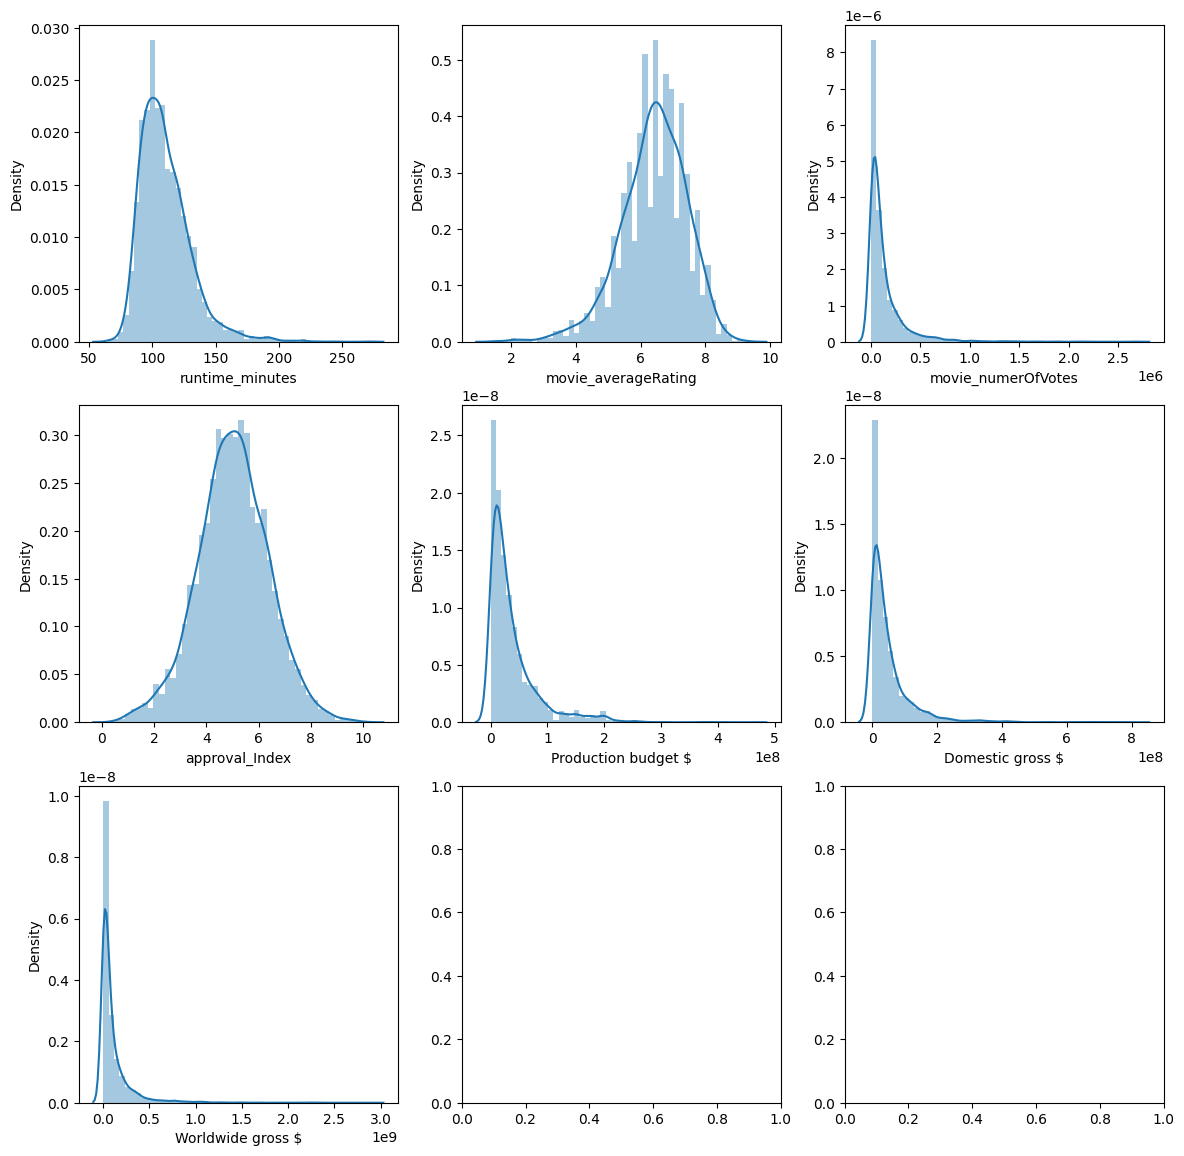

In [8]:
import seaborn as sns
f, axes = plt.subplots(3,3,figsize =(14,14))
sns.distplot(data["runtime_minutes"], ax = axes[0,0])
sns.distplot(data["movie_averageRating"], ax = axes[0,1])
sns.distplot(data["movie_numerOfVotes"], ax = axes[0,2])
sns.distplot(data["approval_Index"], ax = axes[1,0])
sns.distplot(data["Production budget $"], ax = axes[1,1])
sns.distplot(data["Domestic gross $"], ax = axes[1,2])
sns.distplot(data["Worldwide gross $"], ax = axes[2,0])



In [9]:

# Variables categoricas
variables_categoricas = ['movie_title', "production_date" ,'genres', 'director_name', 'director_professions']

for variable in variables_categoricas:
    grupos = data.groupby(variable)['Worldwide gross $'].apply(list)
    resultado_anova = stats.f_oneway(*grupos)
    valor_p = resultado_anova.pvalue
    
    print(f"\nTest de ANOVA para la variable '{variable}':")
    print(f"Valor p: {valor_p}")
    nivel_significancia = 0.05
    if valor_p < nivel_significancia:
        print("Hay diferencias significativas entre los grupos.")
    else:
        print("No se encontraron diferencias significativas entre los grupos.")



Test de ANOVA para la variable 'movie_title':
Valor p: 0.007614262445364754
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'production_date':
Valor p: 2.4666583172060127e-98
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'genres':
Valor p: 2.9974274574666685e-100
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_name':
Valor p: 7.988326317260778e-09
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_professions':
Valor p: 2.0342255267025878e-07
Hay diferencias significativas entre los grupos.


In [10]:
valores_nulos = data.isnull()

# Utiliza sum() para contar los valores True en cada columna, que representa la cantidad de nulos en cada columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Para obtener la cantidad total de valores nulos en el DataFrame, puedes sumar los valores de cantidad_nulos_por_columna
cantidad_total_nulos = cantidad_nulos_por_columna.sum()

# Muestra la cantidad de nulos por columna y la cantidad total de nulos
print("Cantidad de nulos por columna:")
print(cantidad_nulos_por_columna)

print("\nCantidad total de nulos en el DataFrame:", cantidad_total_nulos)

Cantidad de nulos por columna:
movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

Cantidad total de nulos en el DataFrame: 0


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["director_name"] = label_encoder.fit_transform(data["director_name"])
data["genres"] = label_encoder.fit_transform(data["genres"])

data


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,8,192.0,663,"writer,producer,director",1954,alive,7.8,277543.0,7.061,460000000,667830256,2265935552
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,8,137.0,1443,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,13,141.0,897,"writer,producer,director",1964,alive,7.3,870573.0,7.214,365000000,459005868,1395316979
5,Justice League,2017-11-13,8,120.0,1827,"director,producer,writer",1966,alive,6.1,456977.0,5.717,300000000,229024295,655945209
6,Spectre,2015-10-06,14,148.0,1529,"producer,director,miscellaneous",1965,alive,6.8,445461.0,6.376,300000000,200074175,879077344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,2004-05-07,238,100.0,1220,"producer,writer,director",1970,alive,7.2,110078.0,6.018,65000,11529368,22233808
4376,The Brothers McMullen,1995-08-09,173,98.0,451,"actor,writer,producer",1968,alive,6.6,7986.0,4.231,50000,10426506,10426506
4377,Gabriela,2001-03-16,293,93.0,1772,"producer,director,writer",1973,alive,4.9,1593.0,2.526,50000,2335352,2335352
4378,Tiny Furniture,2010-11-12,173,98.0,1008,"writer,actress,producer",1986,alive,6.2,14595.0,4.242,50000,391674,424149


C:\Users\pablo\AppData\Local\Temp\ipykernel_23164\2921579763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


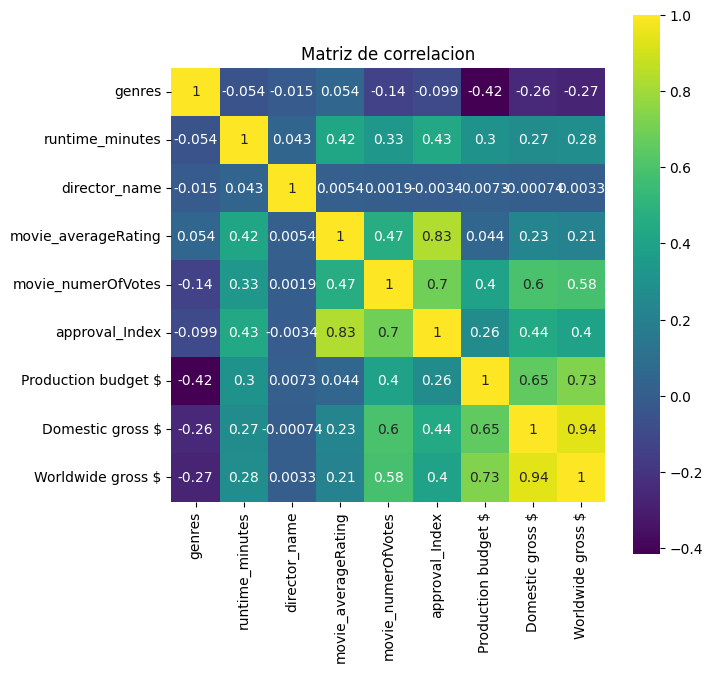

In [12]:
correlation = data.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [28]:
X = data[['Production budget $','movie_numerOfVotes',"Domestic gross $"]]
y = data[['Worldwide gross $',"movie_averageRating"]]
X = np.asarray(X)
y = np.asarray(y)


In [14]:
from sklearn.model_selection import train_test_split
X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [29]:
batched_model = Sequential([
    Dense(64, input_shape=(3,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(2)
]);

In [30]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['accuracy']
)

In [31]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=75, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/75
76/76 - 3s - loss: 21628409478119424.0000 - accuracy: 0.0000e+00 - val_loss: 25882883822452736.0000 - val_accuracy: 0.0000e+00 - 3s/epoch - 35ms/step
Epoch 2/75
76/76 - 0s - loss: 21628409478119424.0000 - accuracy: 0.0000e+00 - val_loss: 25882883822452736.0000 - val_accuracy: 0.0000e+00 - 208ms/epoch - 3ms/step
Epoch 3/75
76/76 - 0s - loss: 21628403035668480.0000 - accuracy: 0.0000e+00 - val_loss: 25882883822452736.0000 - val_accuracy: 0.0000e+00 - 208ms/epoch - 3ms/step
Epoch 4/75
76/76 - 0s - loss: 21628403035668480.0000 - accuracy: 0.0000e+00 - val_loss: 25882881674969088.0000 - val_accuracy: 0.0000e+00 - 205ms/epoch - 3ms/step
Epoch 5/75
76/76 - 0s - loss: 21628400888184832.0000 - accuracy: 0.0000e+00 - val_loss: 25882881674969088.0000 - val_accuracy: 0.0000e+00 - 204ms/epoch - 3ms/step
Epoch 6/75
76/76 - 0s - loss: 21628396593217536.0000 - accuracy: 0.0000e+00 - val_loss: 25882875232518144.0000 - val_accuracy: 0.0000e+00 - 204ms/epoch - 3ms/step
Epoch 7/75
76/76 - 0s - 

In [22]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

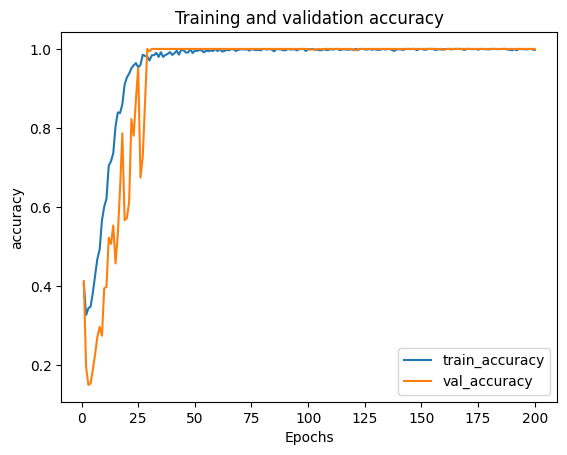

In [23]:
plot_metric(batched_history, 'accuracy')

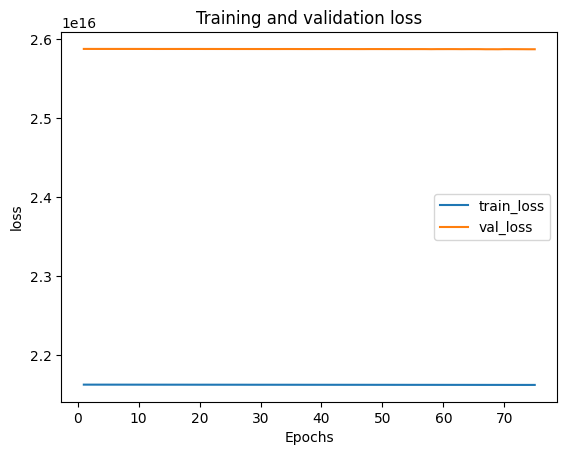

In [26]:
plot_metric(batched_history, 'loss')

In [27]:
batched_model.evaluate(X_test, y_test, verbose=2)

26/26 - 0s - loss: 25278453074886656.0000 - accuracy: 1.0000 - 52ms/epoch - 2ms/step


[2.5278453074886656e+16, 1.0]